In [20]:
import tensorflow as tf
import torch
from tensorflow.keras.datasets import mnist

In [21]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [22]:
# Normalize as imagens para o intervalo [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Converta os rótulos para o formato one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [23]:
from sklearn.model_selection import train_test_split

# Divida o conjunto de treinamento em treinamento e validação
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15, random_state=42)

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Camada de entrada
    tf.keras.layers.Dense(128, activation='relu'),  # Camada oculta com 128 neurônios e função de ativação ReLU
    tf.keras.layers.Dense(10, activation='softmax')  # Camada de saída com 10 neurônios para as 10 classes e função de ativação softmax
])

In [25]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/10
1594/1594 [==============================] - 5s 3ms/step - loss: 0.6859 - accuracy: 0.8296 - val_loss: 0.3979 - val_accuracy: 0.8897
Epoch 2/10
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3545 - accuracy: 0.9019 - val_loss: 0.3202 - val_accuracy: 0.9114
Epoch 3/10
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3031 - accuracy: 0.9150 - val_loss: 0.2853 - val_accuracy: 0.9192
Epoch 4/10
1594/1594 [==============================] - 6s 3ms/step - loss: 0.2726 - accuracy: 0.9236 - val_loss: 0.2610 - val_accuracy: 0.9268
Epoch 5/10
1594/1594 [==============================] - 5s 3ms/step - loss: 0.2498 - accuracy: 0.9303 - val_loss: 0.2439 - val_accuracy: 0.9317
Epoch 6/10
1594/1594 [==============================] - 5s 3ms/step - loss: 0.2320 - accuracy: 0.9356 - val_loss: 0.2287 - val_accuracy: 0.9350
Epoch 7/10
1594/1594 [==============================] - 5s 3ms/step - loss: 0.2166 - accuracy: 0.9398 - val_loss: 0.2150 - val_accuracy:

In [27]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Acurácia no conjunto de teste: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 1s 2ms/step - loss: 0.1794 - accuracy: 0.9493
Acurácia no conjunto de teste: 94.93%


In [28]:
# Salvar o modelo treinado em um arquivo HDF5
model.save("mnist_model.h5")

In [39]:
from PIL import Image
import numpy as np

# Carregue a imagem
image = Image.open("zero_mnist3.png")

# Redimensione a imagem para 28x28 pixels (o mesmo tamanho do MNIST)
image = image.resize((28, 28))

# Converta a imagem para escala de cinza (caso não esteja em escala de cinza)
image = image.convert("L")

# Converta a imagem em um array NumPy
image_array = np.array(image)

# Verifique o tamanho do array da imagem
if image_array.shape == (28, 28):
    # O array tem o tamanho correto (28x28)
    print("A imagem está no formato correto (28x28 pixels).")
else:
    # O array não tem o tamanho correto
    print("A imagem não está no formato correto (28x28 pixels).")


A imagem está no formato correto (28x28 pixels).


1/1 [==============================] - 0s 32ms/step
Classe prevista: 5


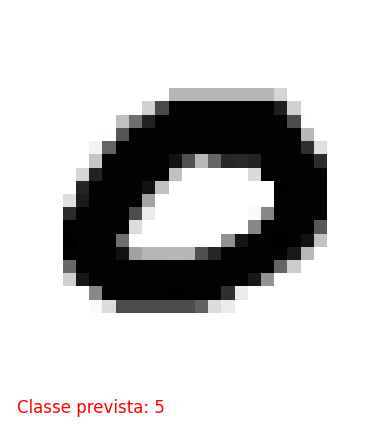

In [38]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Carregue a imagem
image = Image.open("zero_mnist3.png")

# Redimensione a imagem para 28x28 pixels (o mesmo tamanho do MNIST)
image = image.resize((28, 28))

# Converta a imagem para escala de cinza (caso não esteja em escala de cinza)
image = image.convert("L")

# Converta a imagem em um array NumPy
image_array = np.array(image)

# Normalize a imagem para o intervalo [0, 1]
image_array = image_array / 255.0

# Inverta as cores, se necessário (o MNIST é fundo preto com dígitos brancos)
image_array = 1 - image_array

# Certifique-se de que a imagem esteja no formato correto (28x28) e seja um array 2D
if image_array.shape == (28, 28):
    # A imagem está pronta para ser testada pelo modelo
    # Agora você pode usar o modelo treinado para fazer previsões com esta imagem
    prediction = model.predict(np.expand_dims(image_array, axis=0))

    # A variável "prediction" conterá as probabilidades para cada classe (0 a 9)
    # Você pode encontrar a classe mais provável usando np.argmax(prediction)
    predicted_class = np.argmax(prediction)
    print(f"Classe prevista: {predicted_class}")

    # Exibir a imagem original
    plt.imshow(image_array, cmap="gray")
    plt.axis("off")

    # Exibir a previsão embaixo da imagem
    plt.text(0, 30, f"Classe prevista: {predicted_class}", fontsize=12, color="red")

    # Mostrar a imagem com a previsão
    plt.show()
else:
    print("A imagem não está no formato correto (28x28 pixels).")


1/1 [==============================] - 0s 31ms/step


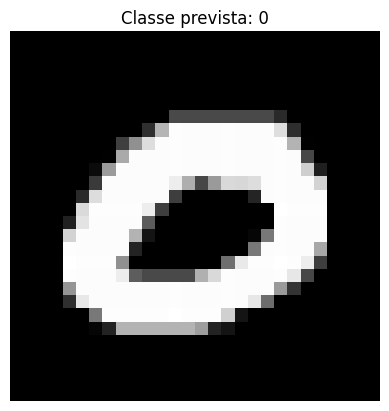

In [43]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Carregue a imagem
image = Image.open("zero_mnist3.png")

# Converta a imagem para uma matriz NumPy
image_array = np.array(image)

# Normalize a imagem para o intervalo [0, 1]
normalized_image = image_array / 255.0

# Certifique-se de que 'normalized_image' é um array NumPy no formato (28, 28)
if normalized_image.shape == (28, 28):
    # 'normalized_image' está pronto para ser testado pelo modelo
    # Agora você pode usar o modelo treinado para fazer previsões com esta imagem
    prediction = model.predict(np.expand_dims(normalized_image, axis=0))

    # A variável 'prediction' conterá as probabilidades para cada classe (0 a 9)
    # Você pode encontrar a classe mais provável usando np.argmax(prediction)
    predicted_class = np.argmax(prediction)
    
    # Exiba a imagem original
    plt.imshow(image_array, cmap="gray")
    plt.axis("off")
    plt.title(f"Classe prevista: {predicted_class}")

    # Mostrar a imagem com a previsão
    plt.show()
else:
    print("A imagem não está no formato correto (28x28 pixels).")
